In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import umap
import pandas as pd
import numpy as np
import seaborn as sns

DATASET: This [dataset](https://www.kaggle.com/alopez247/pokemon) is taken from Kaggle. It contains the specifications of pokemon. I have chosen this dataset as this has a lot of useful features which can be used to measure the similarities while clustering. It contains 21 columns and 721 rows.

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [4]:
df.drop(columns=['Number','Pr_Male', 'Type_2', 'Egg_Group_2'], axis=1, inplace = True)

In [5]:
df.head()

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,Monster,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,Monster,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,Monster,True,2.01,100.0,45,quadruped
3,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,Monster,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,Monster,False,1.09,19.0,45,bipedal_tailed


In [6]:
## Let's one hot encode the required categorical variables
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Name'] = LE.fit_transform(df['Name'])
df['Color'] = LE.fit_transform(df['Color'])
df['Egg_Group_1'] = LE.fit_transform(df['Egg_Group_1'])
df['Body_Style'] = LE.fit_transform(df['Body_Style'])
df['Type_1'] = LE.fit_transform(df['Type_1'])

In [7]:
df.head()

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,67,9,318,45,49,49,65,65,45,1,False,3,True,10,False,0.71,6.9,45,9
1,294,9,405,60,62,63,80,80,60,1,False,3,True,10,False,0.99,13.0,45,9
2,669,9,525,80,82,83,100,100,80,1,False,3,True,10,True,2.01,100.0,45,9
3,86,6,309,39,52,43,60,50,65,1,False,7,True,10,False,0.61,8.5,45,0
4,87,6,405,58,64,58,80,65,80,1,False,7,True,10,False,1.09,19.0,45,0


In [8]:
## Getting dummies for machine learning purpose
df['isLegendary'] = pd.get_dummies(df['isLegendary'])
df['hasGender'] = pd.get_dummies(df['hasGender'])
df['hasMegaEvolution'] = pd.get_dummies(df['hasMegaEvolution'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 19 columns):
Name                721 non-null int64
Type_1              721 non-null int64
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null uint8
Color               721 non-null int64
hasGender           721 non-null uint8
Egg_Group_1         721 non-null int64
hasMegaEvolution    721 non-null uint8
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-null int64
dtypes: float64(2), int64(14), uint8(3)
memory usage: 92.4 KB


In [10]:
df.head()

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,67,9,318,45,49,49,65,65,45,1,1,3,0,10,1,0.71,6.9,45,9
1,294,9,405,60,62,63,80,80,60,1,1,3,0,10,1,0.99,13.0,45,9
2,669,9,525,80,82,83,100,100,80,1,1,3,0,10,0,2.01,100.0,45,9
3,86,6,309,39,52,43,60,50,65,1,1,7,0,10,1,0.61,8.5,45,0
4,87,6,405,58,64,58,80,65,80,1,1,7,0,10,1,1.09,19.0,45,0


In [11]:
X = df.iloc[:,:19]

In [12]:
X.head()

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,67,9,318,45,49,49,65,65,45,1,1,3,0,10,1,0.71,6.9,45,9
1,294,9,405,60,62,63,80,80,60,1,1,3,0,10,1,0.99,13.0,45,9
2,669,9,525,80,82,83,100,100,80,1,1,3,0,10,0,2.01,100.0,45,9
3,86,6,309,39,52,43,60,50,65,1,1,7,0,10,1,0.61,8.5,45,0
4,87,6,405,58,64,58,80,65,80,1,1,7,0,10,1,1.09,19.0,45,0


## Dimensionality Reduction

### PCA

In [13]:
scaler = StandardScaler()
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

Let's plot to choose the optimal number of components

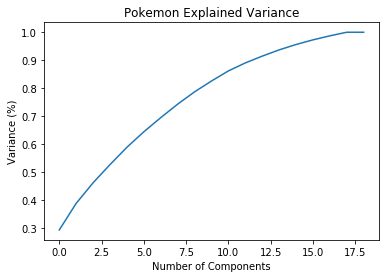

In [14]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pokemon Explained Variance')
plt.show()

In this data, to get 95% of variance explained and preserved I will need **15 principal components.**

In [15]:
# We just want the first two principal components
pca = PCA(n_components=15)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

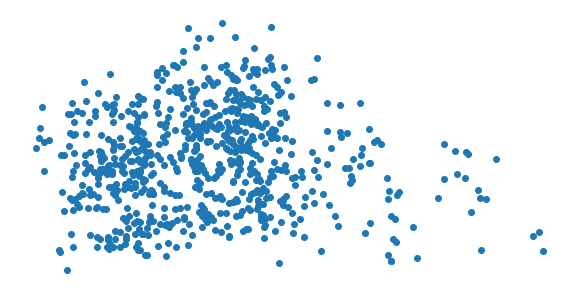

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

In [17]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 721 samples in 0.001s...
[t-SNE] Computed neighbors for 721 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 721 / 721
[t-SNE] Mean sigma: 1.560246
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.856064
[t-SNE] KL divergence after 300 iterations: 1.990626


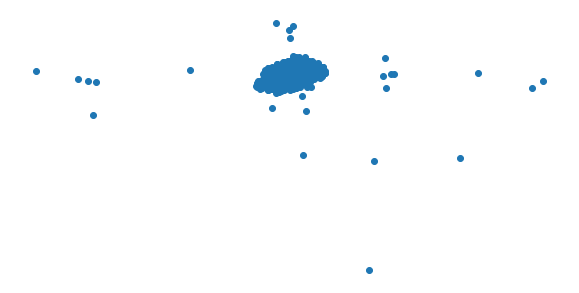

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP reduction

In [19]:
umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

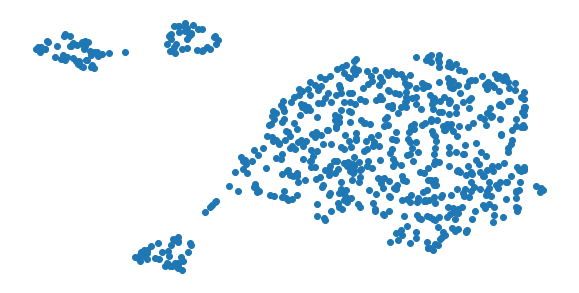

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP did a better job in classyfing the observations.

# Clustering

## K-means clustering

In [21]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X_std)
    Sum_of_squared_distances.append(kmeans.inertia_)

### Elbow method for choosing the number of clusters

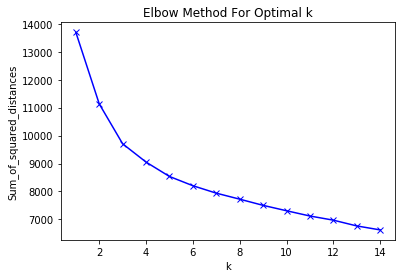

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### choosing number of cluster as 4 would be a good option as that is where the curve is starting bend.

In [23]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

43.7 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


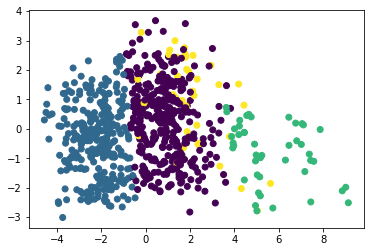

In [24]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_pred)
plt.show()

In [25]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.17932551711031497


#### Let's try minibatch k-means

In [26]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

17.6 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


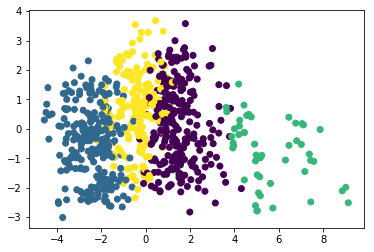

In [27]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=minikmeans_cluster)
plt.show()

In [28]:
labels = MiniBatchKMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.16989192197102138


This classifies much better and faster.

## Heirarchical agglomerative clustering

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

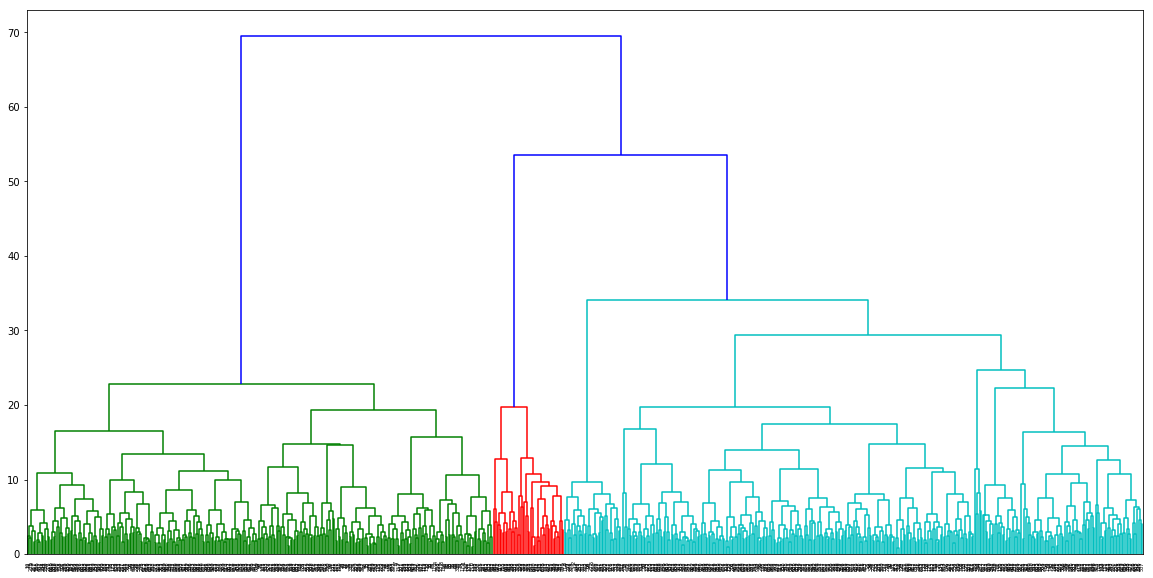

In [30]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

The number of clusters we could choose could be from 3-5 as seen in the elbow method.

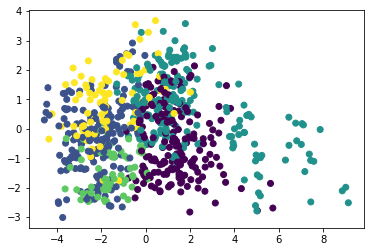

In [31]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

## DBSCAN

In [32]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=3, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

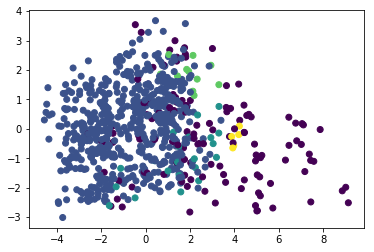

In [33]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

In [34]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.10205349375563579


## Gaussian Mixture Model

In [35]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=15, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

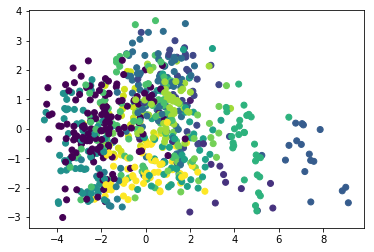

In [36]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.show()

In [37]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.04425285849551335


### Summary
* After reducing the dimensions, we were able to visuazie and understand the data better.